<a href="https://colab.research.google.com/github/Henriquerezer/Machine_Learning/blob/main/COURSERA/IBM/REGRESSION/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# **PART 1**

Importing the data.

 data regarding the price of insurance in the USA, I chose this data because I like working with health related data.

We have columns for:


* **Age**
***BMI** (body mass index)
***Region**
***Charges**
* **Sex** 

The pre-processing of the data was done in this notebook
https://github.com/Henriquerezer/Machine_Learning/blob/main/COURSERA/IBM/REGRESSION/tratamento_de_dados_regressao_insurance.ipynb


**objective**

The objective of this analysis is to predict the value of the health plan charge, for each individual

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/Machine_Learning/main/COURSERA/IBM/REGRESSION/insurance_processado_regressao%20(1).csv')
data.head()

,Unnamed: 0,age,bmi,charges,region_northwest,region_southeast,region_southwest,sex_male,children_1,children_2,children_3+,smoker_1
0,0,-1.438764,0.27900,16.884924,0,0,1,0,0,0,0,1
1,1,-1.509965,0.33770,1.725552,0,1,0,1,1,0,0,0
2,2,-0.797954,0.33000,4.449462,0,1,0,1,0,0,1,0
3,3,-0.441948,0.22705,21.984471,1,0,0,1,0,0,0,0
4,4,-0.513149,0.28880,3.866855,1,0,0,1,0,0,0,0


#**Part 2**

Split between Training and Test, using train_test_split

In [6]:
X = data.drop('charges', axis = 1)
y = data['charges']

In [7]:
# I Will separate in train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [8]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_predicted):
    return np.sqrt(mean_squared_error(y_true, y_predicted))

# **Linear Regression Model**

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

lr_rmse = rmse(y_test, lr.predict(X_test))
print(lr_rmse)

5.8175456284778475


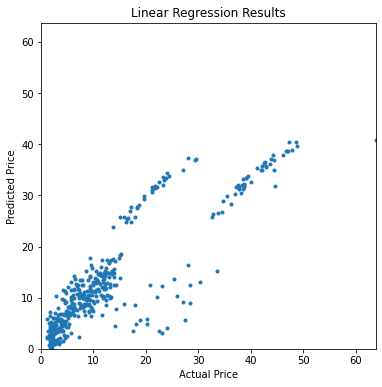

In [10]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.plot(y_test,lr.predict(X_test),marker= 'o', ls = '', ms = 3.0 )

lim = (0, y_test.max())

ax.set(xlabel='Actual Price',
     ylabel='Predicted Price',
     xlim = lim,
     ylim = lim,
     title='Linear Regression Results');

In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': lr.predict(X_test)})
df

,Actual,Predicted
764,9.095068,9.722260
887,5.272176,7.087949
890,29.330983,36.895483
1293,9.301894,9.562642
259,33.750292,26.628275
...,...,...
701,9.541696,16.329697
672,4.399731,6.523166
1163,2.200831,2.464186
1103,11.363283,14.764184


# **Ridge Regression Model**

In [12]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30 , 50]
ridgecv = RidgeCV(alphas = alphas, cv = 10).fit(X_train, y_train)

ridgecv_rmse = rmse(y_test, ridgecv.predict(X_test))

print(ridgecv.alpha_, ridgecv_rmse)

0.1 5.815863735221423


# **Lasso Regression Model**

In [13]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([0.0001,0.005,0.05,0.1,5,20,50,80,120,140])

lassocv = LassoCV(alphas = alphas2, max_iter = 5e4, cv = 10).fit(X_train,y_train)

lassocv_rmse = rmse(y_test, lassocv.predict(X_test))

print(lassocv.alpha_, lassocv_rmse)

0.0001 5.817492050598895


# **ElasticNetCV Regression Model**

In [14]:
from sklearn.linear_model import ElasticNetCV

l1_ratio = np.linspace(0.1,0.9,9)

elasticnetcv = ElasticNetCV(alphas = alphas2, l1_ratio= l1_ratio, max_iter = 1e4).fit(X_train,y_train)

elasticnetcv_rmse = rmse(y_test, elasticnetcv.predict(X_test))

print(elasticnetcv.alpha_,elasticnetcv.l1_ratio_,elasticnetcv_rmse)

0.0001 0.9 5.817303371654657


#**Comparison between models**

In [15]:
rmse_vals = [lr_rmse, ridgecv_rmse, lassocv_rmse, elasticnetcv_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0:'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,5.817546
Ridge,5.815864
Lasso,5.817492
ElasticNet,5.817303


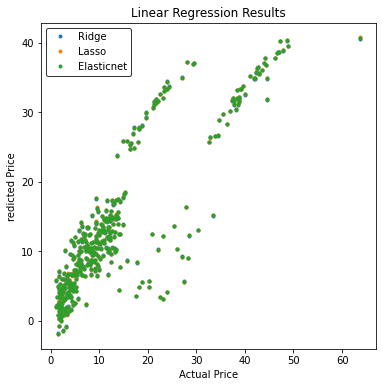

In [16]:
f = plt.figure(figsize=(6,6))
ax= plt.axes()
labels = ['Ridge','Lasso','Elasticnet']
models = [ridgecv,lassocv,elasticnetcv]
          
for mod,lab in zip(models,labels):
    ax.plot(y_test,mod.predict(X_test),
          marker = 'o',ls='',ms=3.0,label=lab)
   
          
leg =  plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price',
     ylabel = 'redicted Price',
     title='Linear Regression Results');

In [17]:
df = pd.DataFrame({'Real': y_test, 'Predicted Linear Regression': lr.predict(X_test),'Predicted Ridge Regression': ridgecv.predict(X_test),'Predicted Lasso Regression': lassocv.predict(X_test), 'Predicted ElasticNet Regression': elasticnetcv.predict(X_test) })
df

,Real,Predicted Linear Regression,Predicted Ridge Regression,Predicted Lasso Regression,Predicted ElasticNet Regression
764,9.095068,9.722260,9.768061,9.722039,9.726465
887,5.272176,7.087949,7.077957,7.089036,7.087956
890,29.330983,36.895483,36.916598,36.897277,36.899165
1293,9.301894,9.562642,9.605365,9.563662,9.567665
259,33.750292,26.628275,26.577527,26.627736,26.622932
...,...,...,...,...,...
701,9.541696,16.329697,16.160409,16.324495,16.308706
672,4.399731,6.523166,6.564434,6.525258,6.529011
1163,2.200831,2.464186,2.461680,2.463962,2.463730
1103,11.363283,14.764184,14.743781,14.764429,14.762430


**There was not much change in the RMSE metric when using the 4 regression models, even so, the best model for this metric among the 4 was ElasticNet Regression.**